(60000, 28, 28, 1)
(10000, 28, 28, 1)


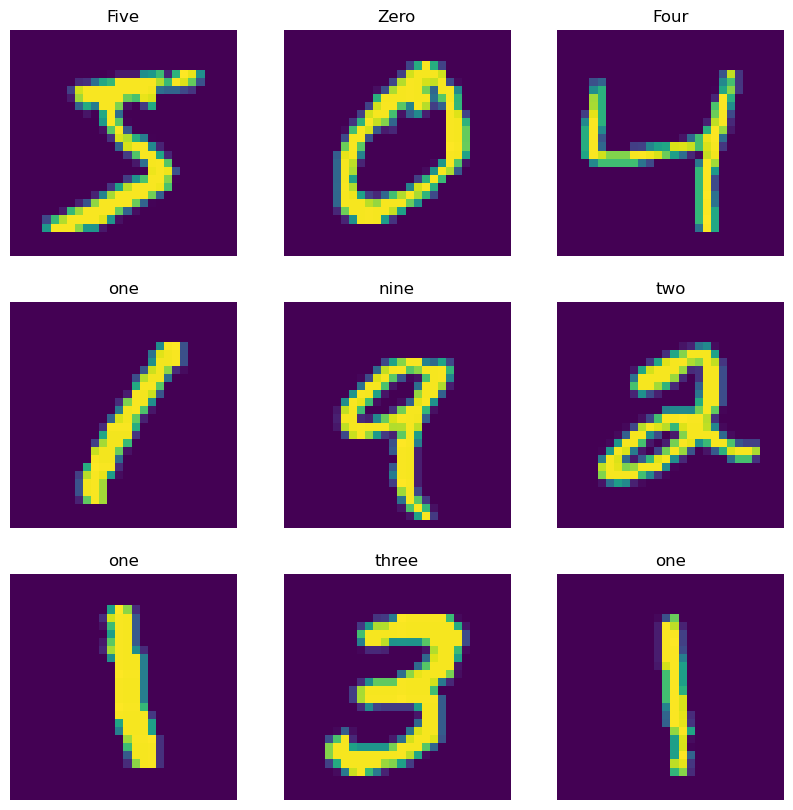

In [19]:
#importing libraries

import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras as keras
from tensorflow.keras.datasets import mnist
import numpy as np



class_names = ['Zero','one','two','three','Four','Five','Six','seven','Eight','nine']

(x_train,y_train),(x_test,y_test) = mnist.load_data()

X_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2], 1))

X_test = x_test.reshape((x_test.shape[0],x_test.shape[1],x_test.shape[2],1))

print(X_train.shape)
print(X_test.shape)


# plot five data with its class name
plt.figure(figsize=(10,10))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i]])
    plt.axis("off")


#convert into grayscale
X_train=X_train/255
X_test=X_test/255



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 91s 47ms/step - accuracy: 0.8976 - loss: 2.5593
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 85s 45ms/step - accuracy: 0.9730 - loss: 0.0912
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 86s 46ms/step - accuracy: 0.9833 - loss: 0.0572
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 83s 44ms/step - accuracy: 0.9845 - loss: 0.0493
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 89s 47ms/step - accuracy: 0.9883 - loss: 0.0377
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - accuracy: 0.9755 - loss: 0.1033
0.9775000214576721
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Predicted: Eight 
Actual: seven


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)                   │ (None, 26, 26, 64)          │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 25, 25, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 23, 23, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │       1,982,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 6,062,240 (23.13 MB)

 Trainable params: 2,020,746 (7.71 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,041,494 (15.42 MB)

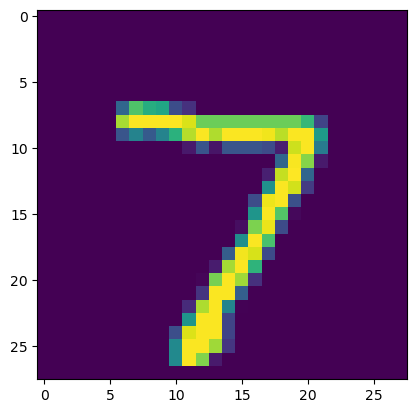

In [22]:

#Model
model = keras.models.Sequential([
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    
keras.layers.Conv2D(64,(3,3),input_shape=(28,28,1),activation="relu"),
keras.layers.MaxPool2D(pool_size=(2,2),strides=1),
    
keras.layers.Flatten(),
    
keras.layers.Dense(64,activation="relu"),
keras.layers.Dense(10,activation="softmax")
])

model.compile(optimizer="adam",loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=["accuracy"])

model.fit(x_train,y_train,epochs=5,callbacks=keras.callbacks.EarlyStopping(patience=2))


#evaluting the model
test_loss,test_acc=model.evaluate(x_test,y_test)
print(test_acc)

#Prediction
sample_img = X_test[0]
sample_img.shape
plt.imshow(sample_img)

img = np.expand_dims(sample_img,axis=0)
img.shape
pred = model.predict(img)
pred
print(f"Predicted: {class_names[np.argmax(pred)]} \nActual: {class_names[y_test[0]]}")

model.summary()